# Model Project - OLG

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm

import matplotlib.pyplot as plt
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2


# Model description



In this project we will first consider a an OLG model with a pay as you go system which we will later compare to an OLG model with a fully funded system.

Individuals live for two periods and we assume constant population:

$L_t=L_{t+1}$

The lifetime utility of a household is defined as:

$U_t=ln(c_{1t})+\frac{1}{(1+\rho)}ln(c_{2t+1}), \ \ \rho>-1$

This is subject to the following constraints:

$c_{1t}=w_t(1-\tau)-s_t$

$c_{2t+1}=s_t(1+r_{t+1})+\tau w_{t+1}$

Thus the model has the following parameters:

$L_t$: The population at time $t$

$U_t$: Lifetime household utility

$\rho$: Consumption discount rate

$c_{1t}$: Consumption of the young

$c_{2t+1}$: Consumption of the old

$w_t$: Wage

$r_t$: Return on capital

$s_t$: Savings

In [2]:
# Define symbols for sympy
K_t = sm.symbols('K_t')
L_t = sm.symbols('L_t')
A = sm.symbols('A')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
rho = sm.symbols('rho')
w_t = sm.symbols('w_t')
r_t = sm.symbols('r_t')
k_t = sm.symbols('k_t')
k_plus = sm.symbols('k_t+1')
Pi = sm.symbols('Pi_t')

s_t = sm.symbols('s_t')
U_t = sm.symbols('U_t')
U = sm.symbols('U_t')
r_plus = sm.symbols('r_t+1')
k = sm.symbols('k^*')

d_t = sm.symbols('d_t')
d_plus = sm.symbols('d_t+1')
tau = sm.symbols('tau')
s_payg = sm.symbols('s_payg')
w_plus = sm.symbols('w_t+1')
k_payg = sm.symbols('k_payg')
U_payg = sm.symbols('U_paygt')
kpaygss = sm.symbols('k_payg^*')

In [3]:
#In order to derive the wage (w) and return on capital (r) we need to solve the firms profit maximization problem.

#Define the profit function
profit = A*(K_t**alpha)*(L_t**(1-alpha))-w_t*L_t-(r_t+delta)*K_t

#Setup the FOC's
foc1=sm.diff(profit,K_t)
foc2=sm.diff(profit,L_t)

#Solve FOC's
solve_foc1=sm.solve(foc1,r_t)[0]
solve_foc2=sm.solve(foc2,w_t)[0]

#Print eqations
print('The profit of a given firm is defined as:')
display(sm.Eq(Pi,profit))
print('By taking the first order conditions to this, we get the expressions for w an r:')
display(sm.Eq(r_t,solve_foc1))
display(sm.Eq(w_t,solve_foc2))

The profit of a given firm is defined as:


Eq(Pi_t, A*K_t**alpha*L_t**(1 - alpha) - K_t*(delta + r_t) - L_t*w_t)

By taking the first order conditions to this, we get the expressions for w an r:


Eq(r_t, A*K_t**alpha*L_t*L_t**(-alpha)*alpha/K_t - delta)

Eq(w_t, A*K_t**alpha*L_t**(-alpha)*(1 - alpha))

We now assume full capital depreciation $\delta=1$

In [4]:
#Setup equations
sample_r=alpha*A*k_t**(alpha-1)-1
sample_w=(1-alpha)*A*k_t**alpha

#Display them
print('By using the marginal products of capital and labour we can simplify these expressions to:')
display(sm.Eq(r_t,sample_r))
display(sm.Eq(w_t,sample_w))

By using the marginal products of capital and labour we can simplify these expressions to:


Eq(r_t, A*alpha*k_t**(alpha - 1) - 1)

Eq(w_t, A*k_t**alpha*(1 - alpha))

We now move unto the household optimization problem and determine the savings rate.

In [5]:
#We solve the household optimization problem and determine savings (s)

#Substitute constraints into utility function
U_t = sm.log(w_t*(1-tau)-s_t)+(1/(1+rho))*sm.log(s_t*(1+r_plus)+tau*w_plus)

#Take the FOC in regards to savings
FOC_U = sm.diff(U_t,s_t)

#Isolate savings
isolate_s = sm.solve(FOC_U,s_t)[0]

#Print results
print('Substitute the constraints into the utility function')
display(sm.Eq(U,U_t))
print('Take the FOC in regards to savings:')
display(sm.Eq(0,FOC_U))
print('Isolate savings:')
display(sm.Eq(s_t,isolate_s))
print('we can simplify this to:')
display(sm.Eq(s_t,-tau*w_plus*(rho+1)/((r_plus+1)*(rho+2))+w_t*(1-tau)/(rho+2)))


Substitute the constraints into the utility function


Eq(U_t, log(-s_t + w_t*(1 - tau)) + log(s_t*(r_t+1 + 1) + tau*w_t+1)/(rho + 1))

Take the FOC in regards to savings:


Eq(0, (r_t+1 + 1)/((rho + 1)*(s_t*(r_t+1 + 1) + tau*w_t+1)) - 1/(-s_t + w_t*(1 - tau)))

Isolate savings:


Eq(s_t, (-r_t+1*tau*w_t + r_t+1*w_t - rho*tau*w_t+1 - tau*w_t - tau*w_t+1 + w_t)/(r_t+1*rho + 2*r_t+1 + rho + 2))

we can simplify this to:


Eq(s_t, -tau*w_t+1*(rho + 1)/((r_t+1 + 1)*(rho + 2)) + w_t*(1 - tau)/(rho + 2))

# Steady state

We now wish to determine the steady state level of capital $k^*$

In [6]:
# We define capital accumulation using the previuos expressions and solve for the steady state level of capital.

#capital accumulation 
print('capital accumulation is given by')
display(sm.Eq(k_plus,-tau*w_plus*(rho+1)/((r_plus+1)*(rho+2))+w_t*(1-tau)/(rho+2)))
print('We insert the expressions for w and r and get')
display(sm.Eq(k_plus,(A*k_t**(alpha)*(1-alpha)*(1-tau))/(rho+2)-(k_plus**(1-alpha)*tau*w_plus*(rho+1))/(A*alpha*(rho+2))))

capital accumulation is given by


Eq(k_t+1, -tau*w_t+1*(rho + 1)/((r_t+1 + 1)*(rho + 2)) + w_t*(1 - tau)/(rho + 2))

We insert the expressions for w and r and get


Eq(k_t+1, A*k_t**alpha*(1 - alpha)*(1 - tau)/(rho + 2) - k_t+1**(1 - alpha)*tau*w_t+1*(rho + 1)/(A*alpha*(rho + 2)))

In [7]:
capital_accumulation = 1/(1+(1+rho)/(2+rho)*(1-alpha)/alpha*tau)*(((1-alpha)*(1-tau))/(2+rho)*A*k_t**alpha)
capital_accumulation

A*k_t**alpha*(1 - alpha)*(1 - tau)/((1 + tau*(1 - alpha)*(rho + 1)/(alpha*(rho + 2)))*(rho + 2))

In the steady state it is true that 

$k_{t+1}=k_t=k^*$

We can therefore rewrite the above to:

In [8]:
#Define the steady state capital
ssk=sm.Eq(k,(1/(1+(1+rho)/(2+rho)*(1-alpha)/(alpha)*tau)*((1-alpha)*(1-tau))/(2+rho)*A)**(1/(1-alpha)))
display(ssk)


Eq(k^*, (A*(1 - alpha)*(1 - tau)/((1 + tau*(1 - alpha)*(rho + 1)/(alpha*(rho + 2)))*(rho + 2)))**(1/(1 - alpha)))

## Analytical solution

In [18]:
#Create a function to determine capital level in steady state given a set of parameters
ssk_solve = sm.solve(ssk,k)
ss_func = sm.lambdify((alpha,tau,rho,A),ssk_solve)

# Assign arbitrary values to the parameters
value_alpha = 0.20
value_tau = 0.25
value_rho = 0.1
value_A = 2

#Run the function with the values
res=ss_func(value_alpha,value_tau,value_rho,value_A)

#Display results
print('Thus we find that the ss capital level, given the parameters, is: '+str(k)+' = '+str(res[0]))

Thus we find that the ss capital level, given the parameters, is: k^* = 0.29345335876374135


We can also check this by doing it manually.

In [19]:
#Define function
def ss_alt(alpha, tau, rho, A):
    #Basically the equation for the steady state capital
    return((1/(1+(1+rho)/(2+rho)*(1-alpha)/(alpha)*tau)*((1-alpha)*(1-tau))/(2+rho)*A)**(1/(1-alpha)))
#Print results with given parameters
print(f'The steady state capital in the pay as you go model is: '+str(ss_alt(value_alpha,value_tau,value_rho,value_A)))


The steady state capital in the pay as you go model is: 0.29345335876374135


# Numerical solution

In [20]:
#Define a lambda function for the capital accumulation function and optimize in regards to k
obj_kpayg = lambda kpayg: kpayg - (1/(1+(1+value_rho)/(2+value_rho)*(1-value_alpha)/value_alpha*value_tau)*(((1-value_alpha)*(1-value_tau))/(2+value_rho)*value_A*kpayg**value_alpha))

r_payg = optimize.root_scalar(obj_kpayg, bracket=[0.1, 100], method='brentq')

#Print results
print(r_payg)
print(f'k^*={r_payg.root:.4f}')

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 0.2934533587636173
k^*=0.2935


# OLG Fully Funded system

Next an OLG model with a fully funded system is solved.



# Model description

The lifetime utility of a household is the same as in the pay as you go model:

$U_t=ln(c_{1t})+\frac{1}{(1+\rho)}ln(c_{2t+1}), \ \ \rho>-1$

The constraint now looks as following, the government takes part of their wage and invest it. In period 2 they receive this amount plus the interest earned, plus any additional savings they have made:

$c_{1t}=w_t(1-\tau)-s_t$

$c_{2t+1}=(s_t+w_t\tau)(1+r_{t+1})$

There is still full depreciation and a constant population. The firms maximisation problem does not change. 

The approach for solving this model is the same as for the pay as you go model.

In [21]:
#We solve the household optimization problem and determine savings (s)

#Substitute constraints into utility function
U_t2 = sm.log(w_t*(1-tau)-s_t)+(1/(1+rho))*sm.log((s_t+w_t*tau)*(1+r_plus))

#Take the FOC in regards to savings
FOC_U2 = sm.diff(U_t2,s_t)

#Isolate savings
isolate_s2 = sm.solve(FOC_U2,s_t)[0]

#Print results
print('Substitute the constraints into the utility function')
display(sm.Eq(U,U_t2))
print('Take the FOC in regards to savings:')
display(sm.Eq(0,FOC_U2))
print('Isolate savings:')
display(sm.Eq(s_t,isolate_s2))

#Reducing
print('Reduce this to:')
s2 = w_t*(1/(2+rho)-tau)
s2 = sm.Eq(s_t,s2)
display(s2)

print('Substitute in wage:')
display(s2.subs(w_t, sample_w))

#Substitute in k_t
cap=s2.subs(w_t, sample_w)

#Display the cap accum
print('From this we can get the capital accumulation expression')
display(cap.subs(s_t, k_plus))

Substitute the constraints into the utility function


Eq(U_t, log(-s_t + w_t*(1 - tau)) + log((r_t+1 + 1)*(s_t + tau*w_t))/(rho + 1))

Take the FOC in regards to savings:


Eq(0, -1/(-s_t + w_t*(1 - tau)) + 1/((rho + 1)*(s_t + tau*w_t)))

Isolate savings:


Eq(s_t, w_t*(-rho*tau - 2*tau + 1)/(rho + 2))

Reduce this to:


Eq(s_t, w_t*(-tau + 1/(rho + 2)))

Substitute in wage:


Eq(s_t, A*k_t**alpha*(1 - alpha)*(-tau + 1/(rho + 2)))

From this we can get the capital accumulation expression


Eq(k_t+1, A*k_t**alpha*(1 - alpha)*(-tau + 1/(rho + 2)))

# Steady State

In the steady state it is true that 

$k_{t+1}=k_t=k^*$

We can therefore rewrite the above to:

In [22]:
#Define the steady state capital expression
ssk2=sm.Eq(k,((A*(alpha*rho*tau+2*alpha*tau-alpha-rho*tau-2*tau+1))/(rho+2))**(-1/(alpha-1)))
#display it
display(ssk2)


Eq(k^*, (A*(alpha*rho*tau + 2*alpha*tau - alpha - rho*tau - 2*tau + 1)/(rho + 2))**(-1/(alpha - 1)))

# Analytical Solution

In [23]:
#Create a function to determine capital level in steady state given a set of parameters
ssk_solve2 = sm.solve(ssk2,k)
ss_func2 = sm.lambdify((alpha,tau,rho,A),ssk_solve2)

#Run the function with the values
res2=ss_func2(value_alpha,value_tau,value_rho,value_A)

#Display results
print('Thus we find that the ss capital level, given the parameters, is: '+str(k)+' = '+str(res2[0]))


Thus we find that the ss capital level, given the parameters, is: k^* = 0.28070029686156567


# Nummerical Solution

We now run the nummerical analysis

In [24]:
display(cap.subs(s_t, k_plus))
display((A*k_t**alpha*(1-alpha))*(-tau+1/(rho+2)))

Eq(k_t+1, A*k_t**alpha*(1 - alpha)*(-tau + 1/(rho + 2)))

A*k_t**alpha*(1 - alpha)*(-tau + 1/(rho + 2))

In [25]:
#Define a lambda function for the capital accumulation function and optimize in regards to k
obj_kff = lambda kff: kff - ((value_A*kff**value_alpha*(1-value_alpha))*(-value_tau+1/(value_rho+2)))

r_ff = optimize.root_scalar(obj_kff, bracket=[0.1, 100], method='brentq')

#Print results
print(r_ff)
print(f'k^*={r_ff.root:.4f}')

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 0.2807002968610902
k^*=0.2807


# Comparision of the fully funded system and the payg system

From this we see that in the payg system there was a capital level of 0.293 and in the fully funded it was 0.281. It would therefore seem that with the given parameters that the capital level is higher in the payg-model.

One could furthermore try to change the parameters, like the tax level to observe the changes which we will do now.

In [26]:
# Assign a new tax value (tau)
value_tau = 0.35

#Numerical for payg with new tax level
obj_kpayg = lambda kpayg: kpayg - (1/(1+(1+value_rho)/(2+value_rho)*(1-value_alpha)/value_alpha*value_tau)*(((1-value_alpha)*(1-value_tau))/(2+value_rho)*value_A*kpayg**value_alpha))

r_payg = optimize.root_scalar(obj_kpayg, bracket=[0.1, 100], method='brentq')

#Print results
print('For a tax value of 35% we observe in the payg-system: ')
print(f'k^*={r_payg.root:.4f}')

#numerical for ff with new tax level
obj_kff = lambda kff: kff - ((value_A*kff**value_alpha*(1-value_alpha))*(-value_tau+1/(value_rho+2)))

r_ff = optimize.root_scalar(obj_kff, bracket=[0.1, 100], method='brentq')

#Print results
print('And in the fully funded system we observe: ')
print(f'k^*={r_ff.root:.4f}')

For a tax value of 35% we observe in the payg-system: 
k^*=0.2089
And in the fully funded system we observe: 
k^*=0.1353


In [27]:
# Assign a new tax value (tau)
value_tau = 0.05

#Numerical for payg with new tax level
obj_kpayg = lambda kpayg: kpayg - (1/(1+(1+value_rho)/(2+value_rho)*(1-value_alpha)/value_alpha*value_tau)*(((1-value_alpha)*(1-value_tau))/(2+value_rho)*value_A*kpayg**value_alpha))

r_payg = optimize.root_scalar(obj_kpayg, bracket=[0.1, 100], method='brentq')

#Print results
print('For a tax value of 5% we observe in the payg-system: ')
print(f'k^*={r_payg.root:.4f}')

#numerical for ff with new tax level
obj_kff = lambda kff: kff - ((value_A*kff**value_alpha*(1-value_alpha))*(-value_tau+1/(value_rho+2)))

r_ff = optimize.root_scalar(obj_kff, bracket=[0.1, 100], method='brentq')

#Print results
print('And in the fully funded system we observe: ')
print(f'k^*={r_ff.root:.4f}')

For a tax value of 5% we observe in the payg-system: 
k^*=0.5894
And in the fully funded system we observe: 
k^*=0.6197


In [67]:
tau_vec = np.linspace(0,0.4,100)
obj_kpayg = lambda kpayg, value_tau: kpayg - (1/(1+(1+value_rho)/(2+value_rho)*(1-value_alpha)/value_alpha*value_tau)*(((1-value_alpha)*(1-value_tau))/(2+value_rho)*value_A*kpayg**value_alpha))

r_payg_vec = [optimize.root_scalar(obj_kpayg, bracket=[0.0001, 100], method='brentq',args=(tau_val)).root for tau_val in tau_vec ]



obj_kff = lambda kff, value_tau: kff - ((value_A*kff**value_alpha*(1-value_alpha))*(-value_tau+1/(value_rho+2)))

r_ff_vec = [optimize.root_scalar(obj_kff, bracket=[0.0001, 100], method='brentq',args=(tau_val)).root for tau_val in tau_vec]

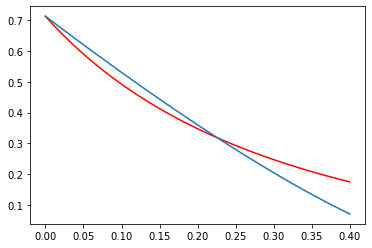

In [69]:
plt.plot(tau_vec,r_payg_vec,color='red')
plt.plot(tau_vec,r_ff_vec);

# Conclusion

From these results it would seem that capital levels in the fully funded system are actually higher given that the tax is low.
It would therefore seem that by increasing taxes the capital levels in both systems fall, but that the fully funded system falls at a greater rate than the payg-system.

In conclusion taxes seems to affect the fully funded system more severely than the payg-system.